In [8]:
import pandas as pd

import matplotlib.pyplot as plt

In [9]:
df_raw_data = pd.read_csv('../data/processed_data/combined_data.csv')
df_raw_data['datetime'] = pd.to_datetime(df_raw_data['datetime'])
# make sure the sorting is correct
df_raw_data = df_raw_data.sort_values(by=['device','datetime']).reset_index(drop=True)
df_raw_data = df_raw_data.set_index('datetime')

In [10]:
def generate_color_dict(devices, color_map=plt.cm.tab20):
    # Generate a color dictionary for each device using a color map
    color_dict = {device: color_map(i / len(devices)) for i, device in enumerate(devices)}
    return color_dict
unique_devices = df_raw_data['device'].unique()
color_dict = generate_color_dict(unique_devices)

In [11]:
def feature_plot(input: pd.DataFrame, device: str, color_dict: dict):
    # Filter the data for the specified device
    df = input[input['device'] == device]

    # Set up the subplot for the six features
    fig, axs = plt.subplots(6, 1, figsize=(10, 18), sharex=True)

    # Use the color assigned to the device from color_dict
    device_color = color_dict.get(device, 'black')  # Default to 'black' if device not in color_dict

    # Plot each feature in a separate subplot
    for i, column in enumerate(['windspeed', 'pressure', 'temperature', 'humidity', 'sunlight', 'power']):
        axs[i].plot(df.index, df[column], color=device_color, marker='o', markersize=1)
        axs[i].set_title(f'{device}: {column.capitalize()} over Time')
        axs[i].set_ylabel(column.capitalize())

    # Set the shared x-axis label
    axs[-1].set_xlabel('Datetime')

    plt.tight_layout()
    plt.show()

In [12]:
def plot_feature_across_devices(input: pd.DataFrame, feature: str, color_dict: dict, drop_device=None):
    # Get the list of unique devices
    unique_devices = list(input['device'].unique())

    # Remove any devices listed in drop_device
    if drop_device:
        unique_devices = [device for device in unique_devices if device not in drop_device]

    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Plot the selected feature for each device using the predefined color
    for device in unique_devices:
        device_data = input[input['device'] == device]
        device_color = color_dict.get(device, 'black')  # Default to 'black' if the device is not in the color_dict
        plt.plot(device_data.index, device_data[feature], color=device_color, label=device)

    # Set plot labels and title
    plt.xlabel('Datetime')
    plt.ylabel(feature.capitalize())
    plt.title(f'{feature.capitalize()} Over Time Across Devices')
    plt.legend(title="Device")

    plt.tight_layout()
    plt.show()

In [13]:
df_raw_data.device.value_counts().index

Index(['L8', 'L1', 'L17', 'L10', 'L9', 'L2', 'L15', 'L16', 'L12', 'L13', 'L14',
       'L11', 'L4', 'L3', 'L5', 'L6', 'L7'],
      dtype='object', name='device')

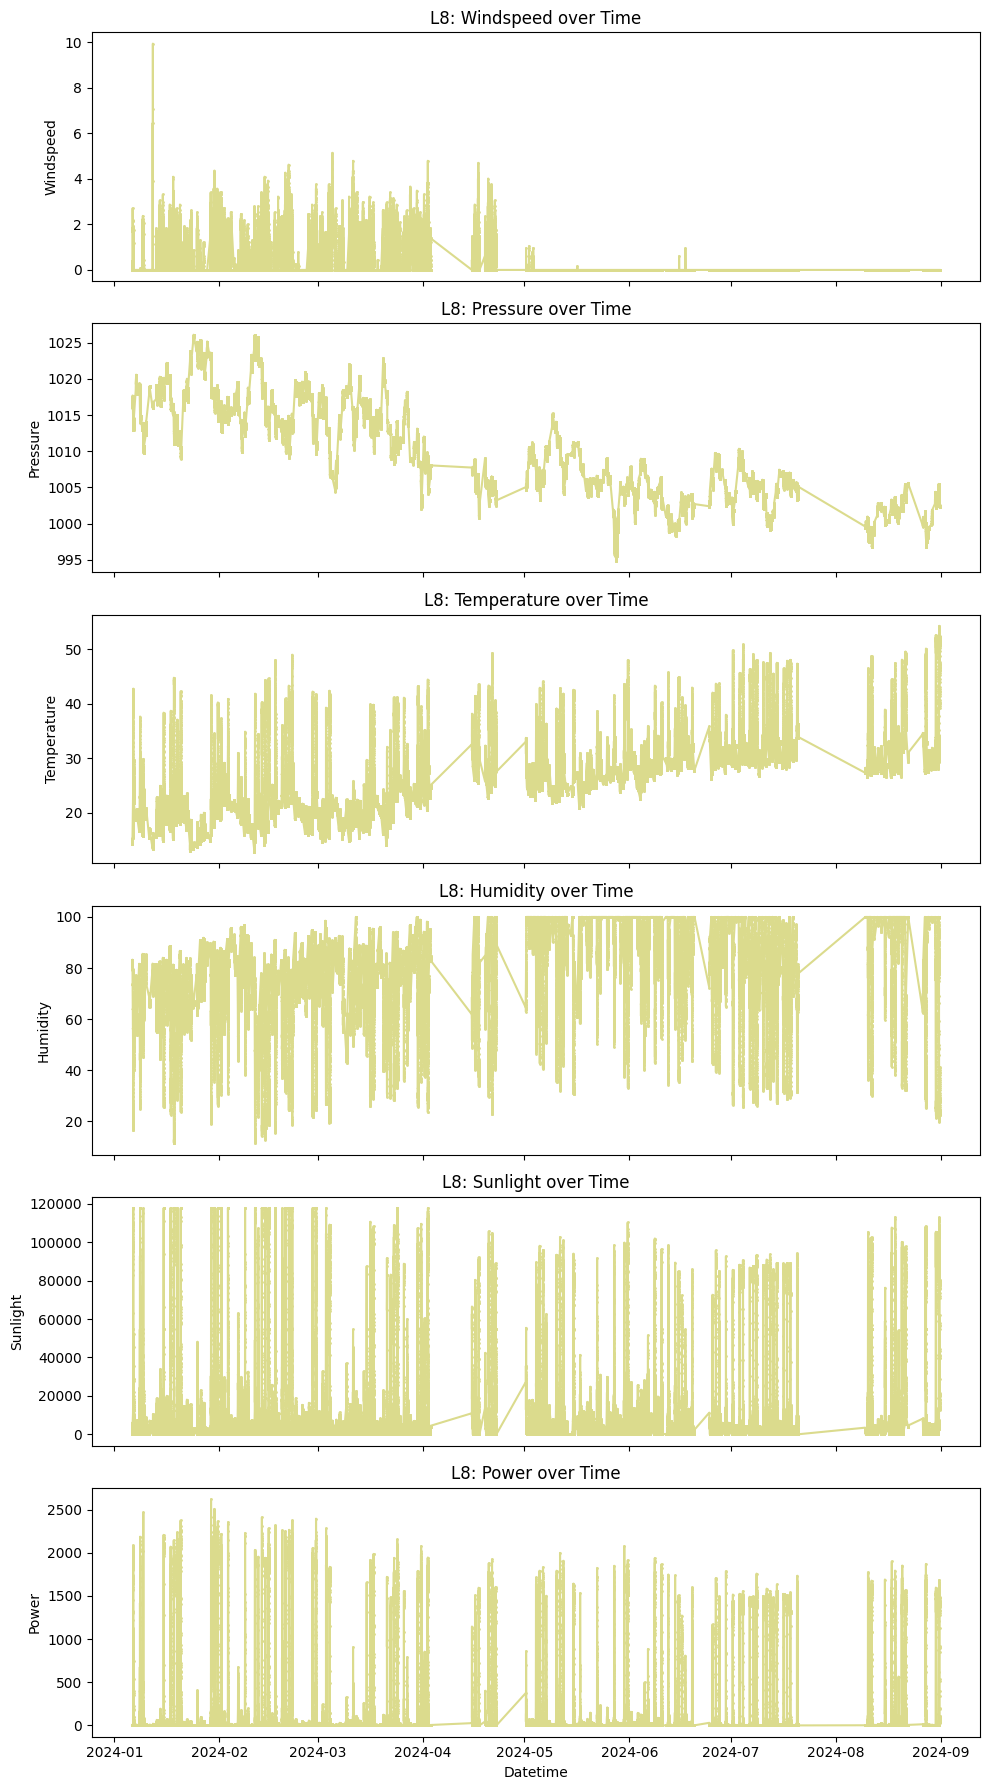

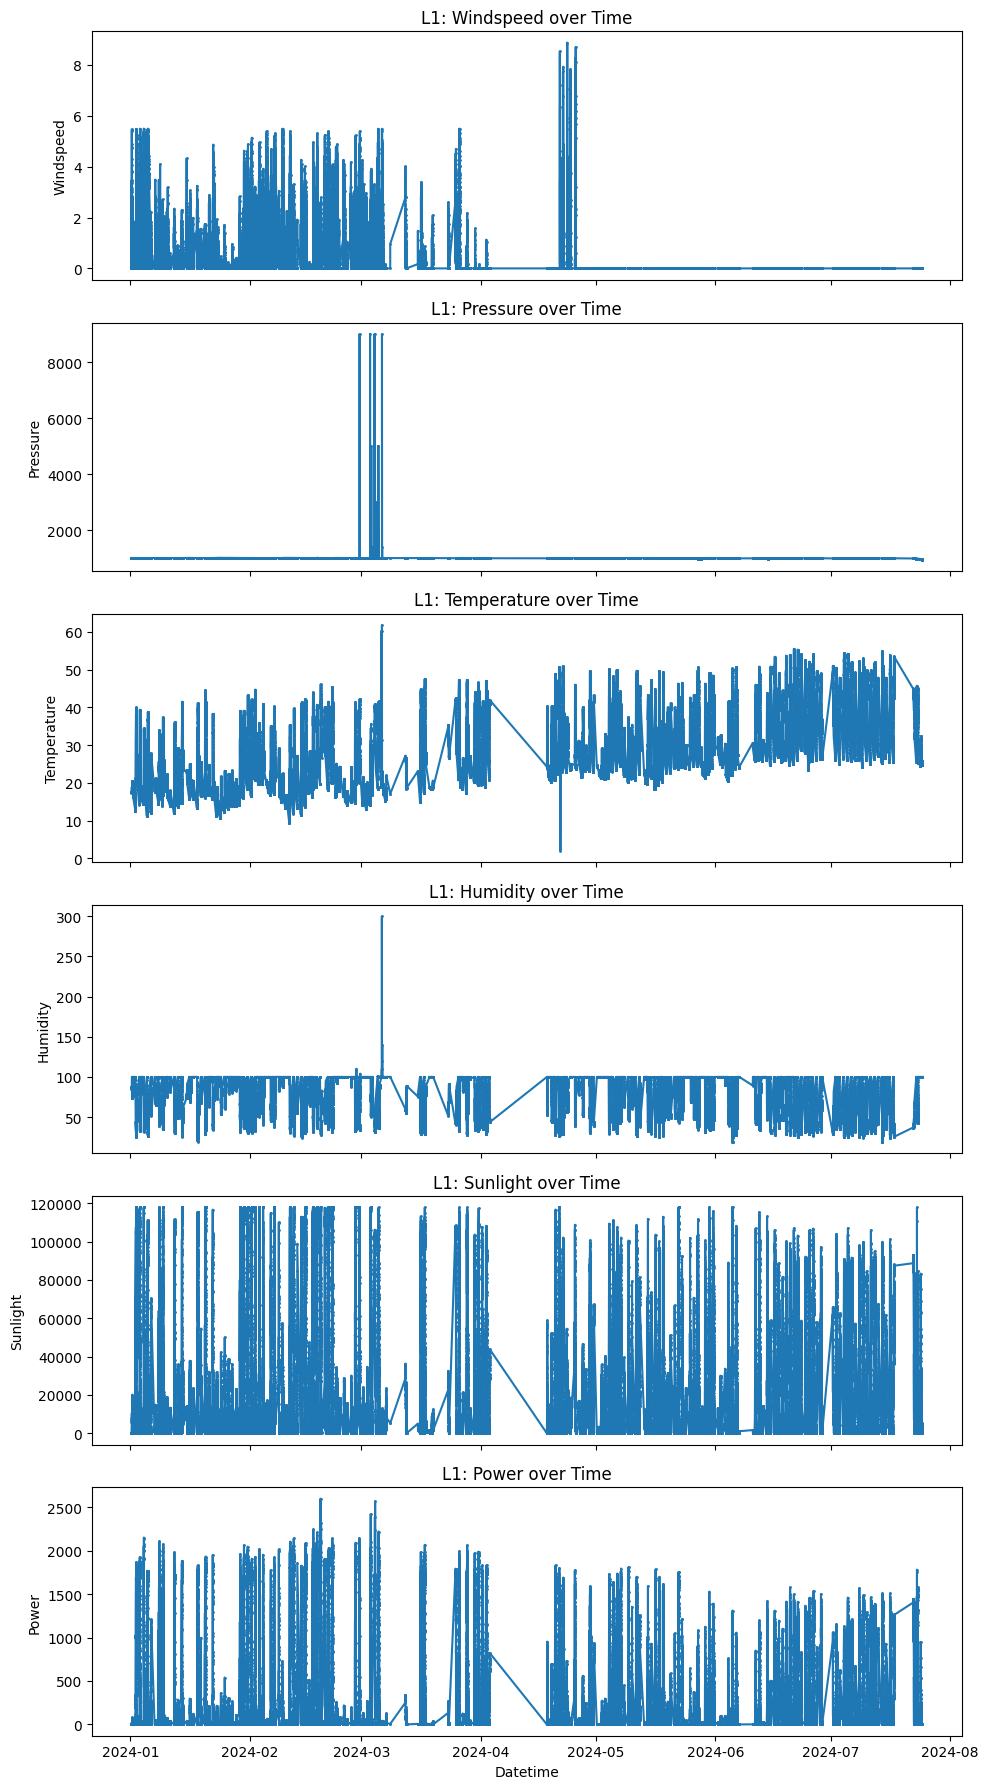

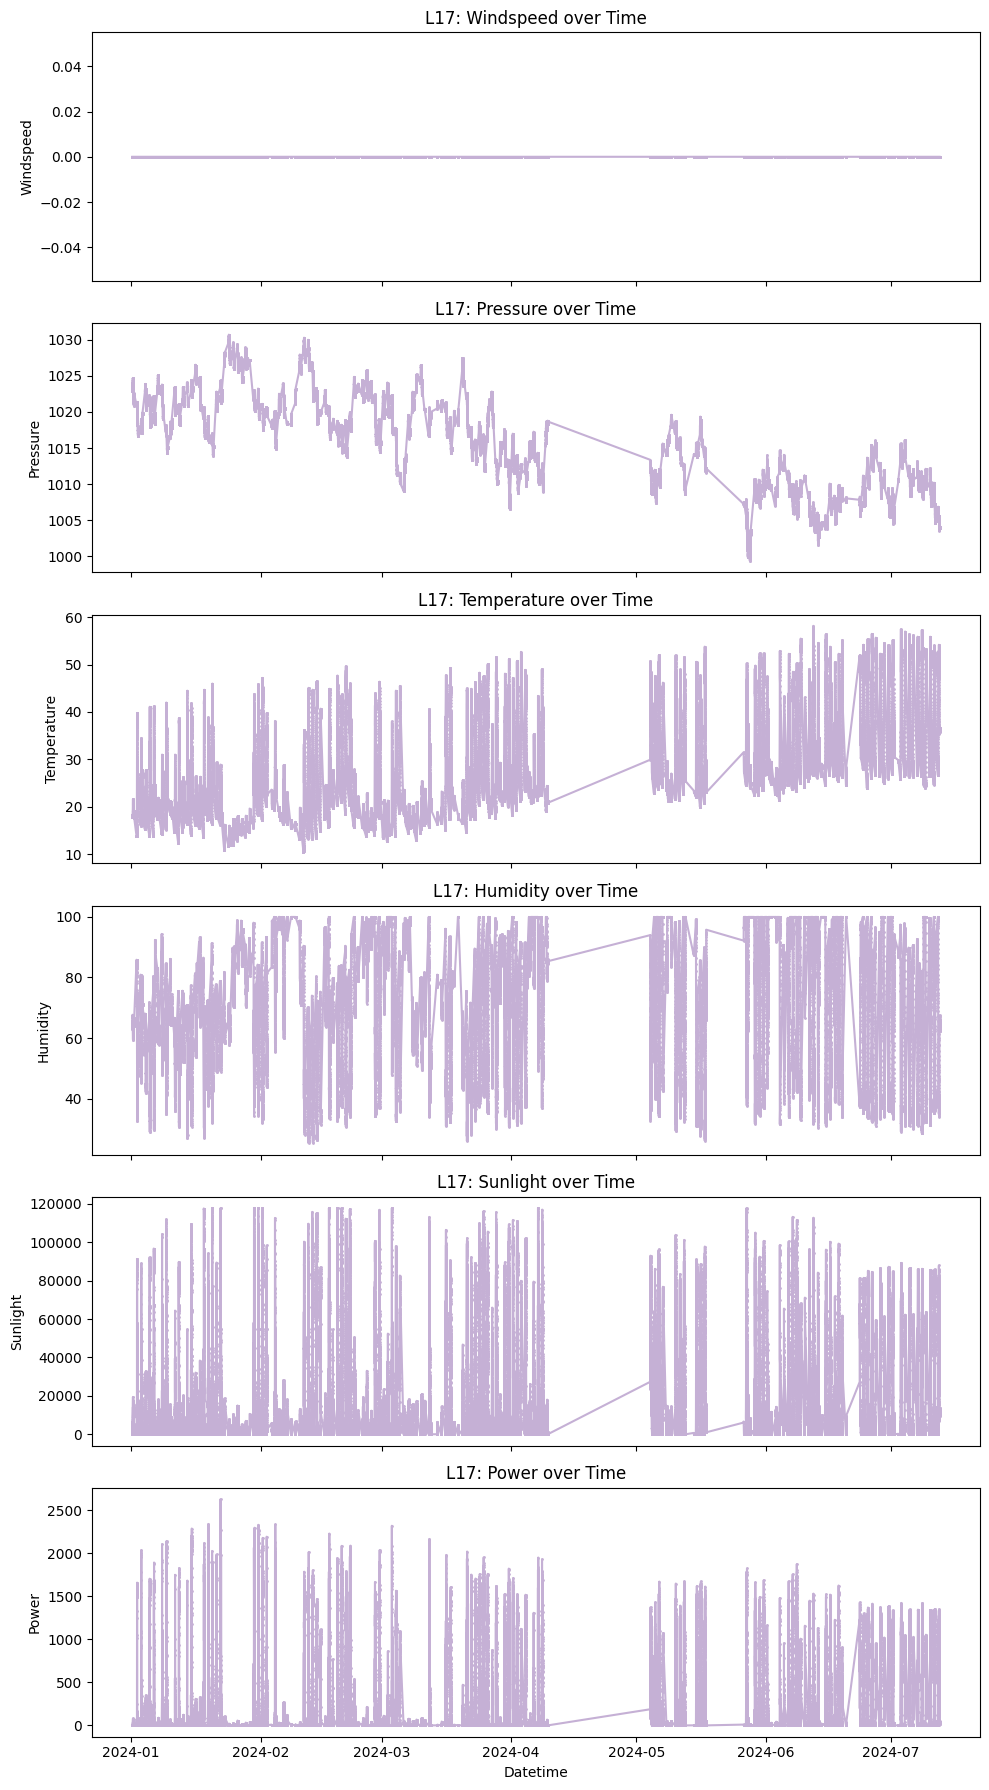

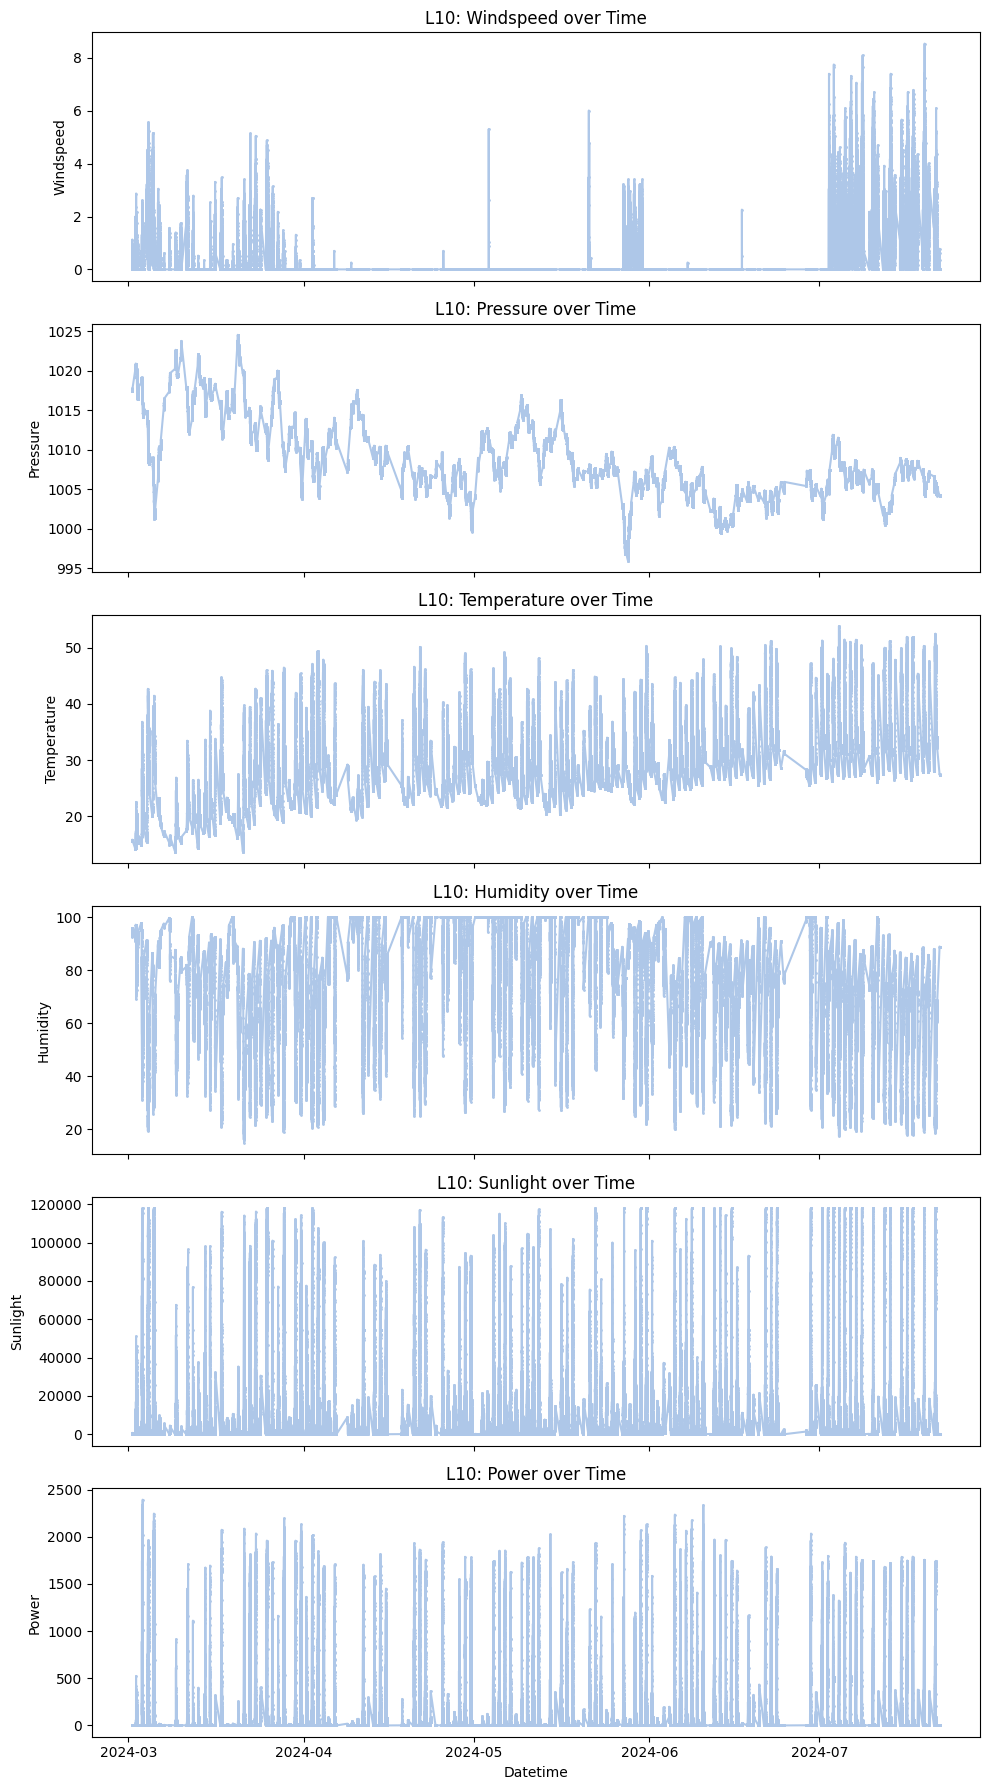

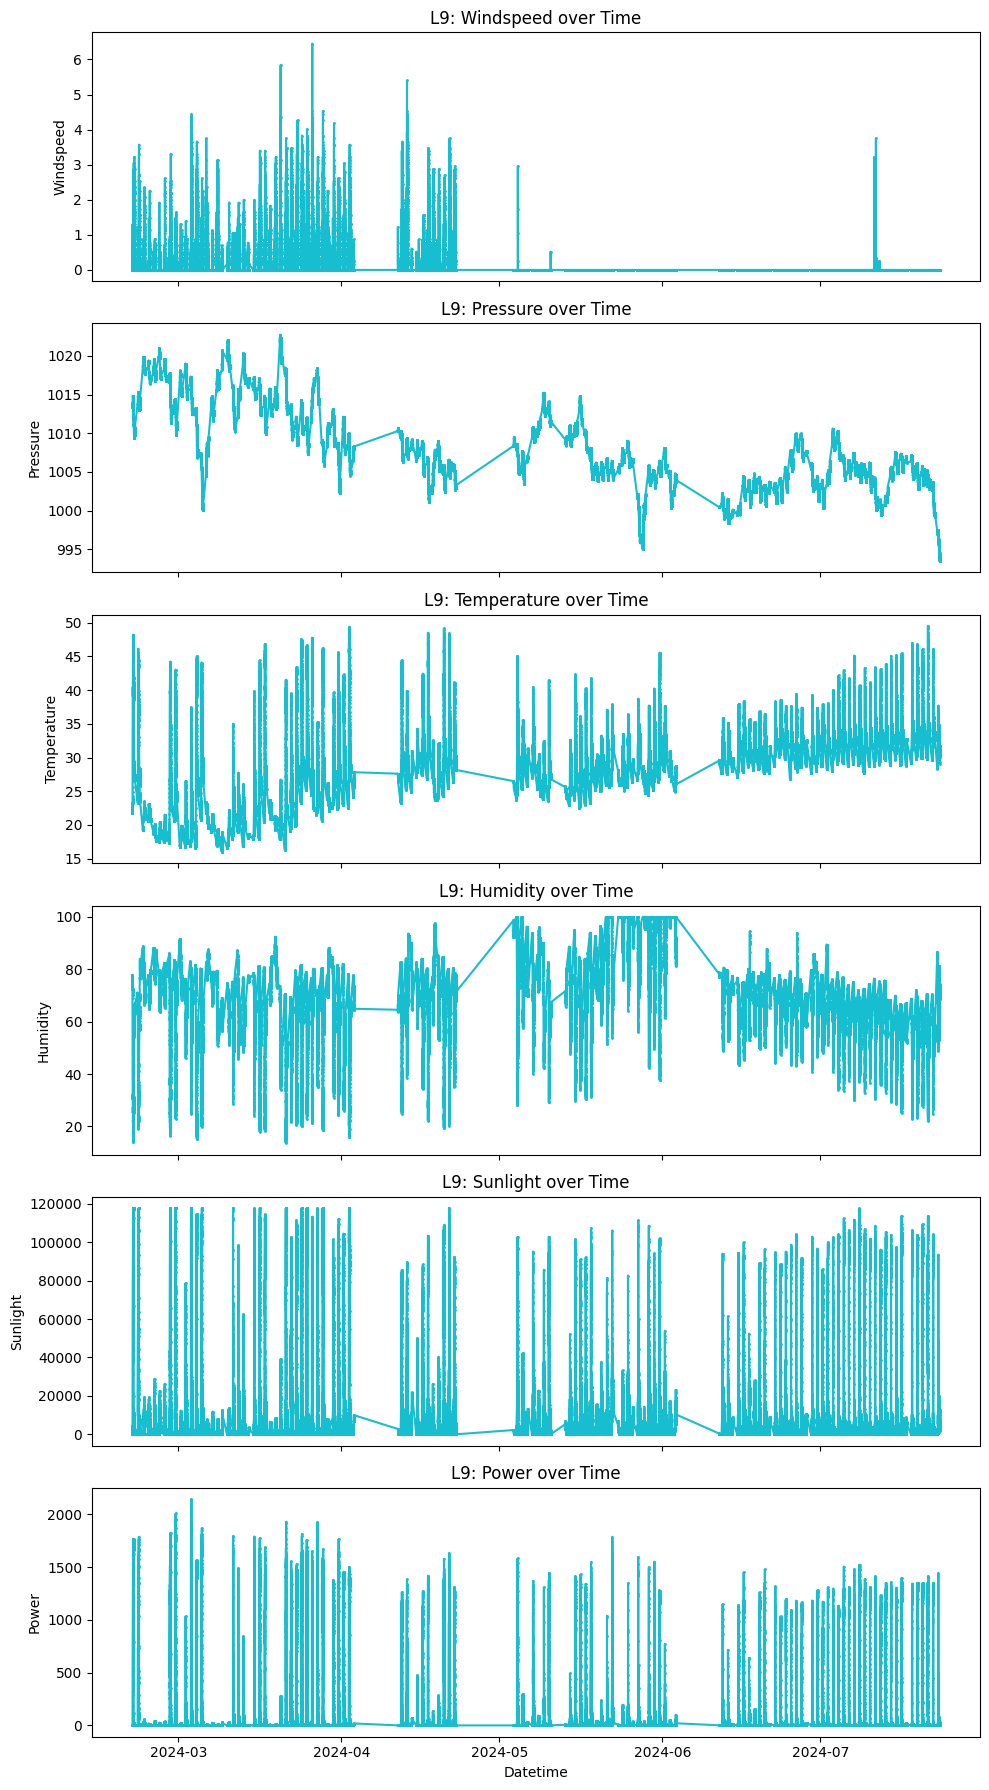

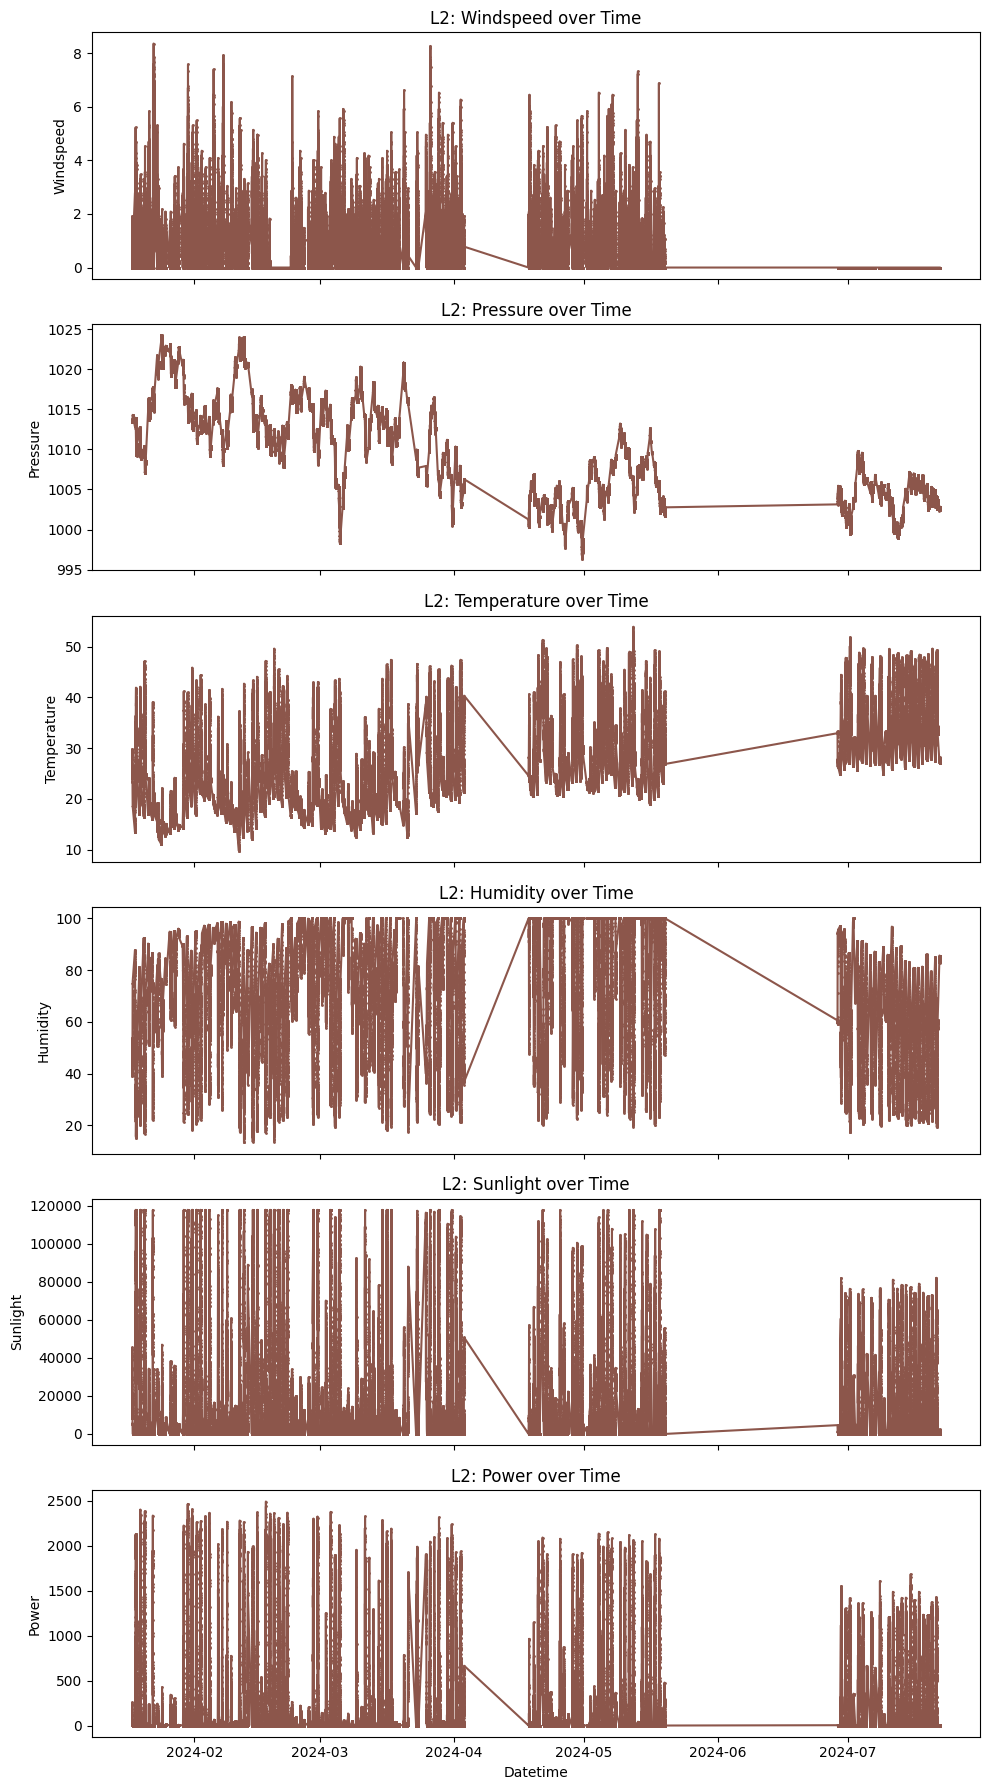

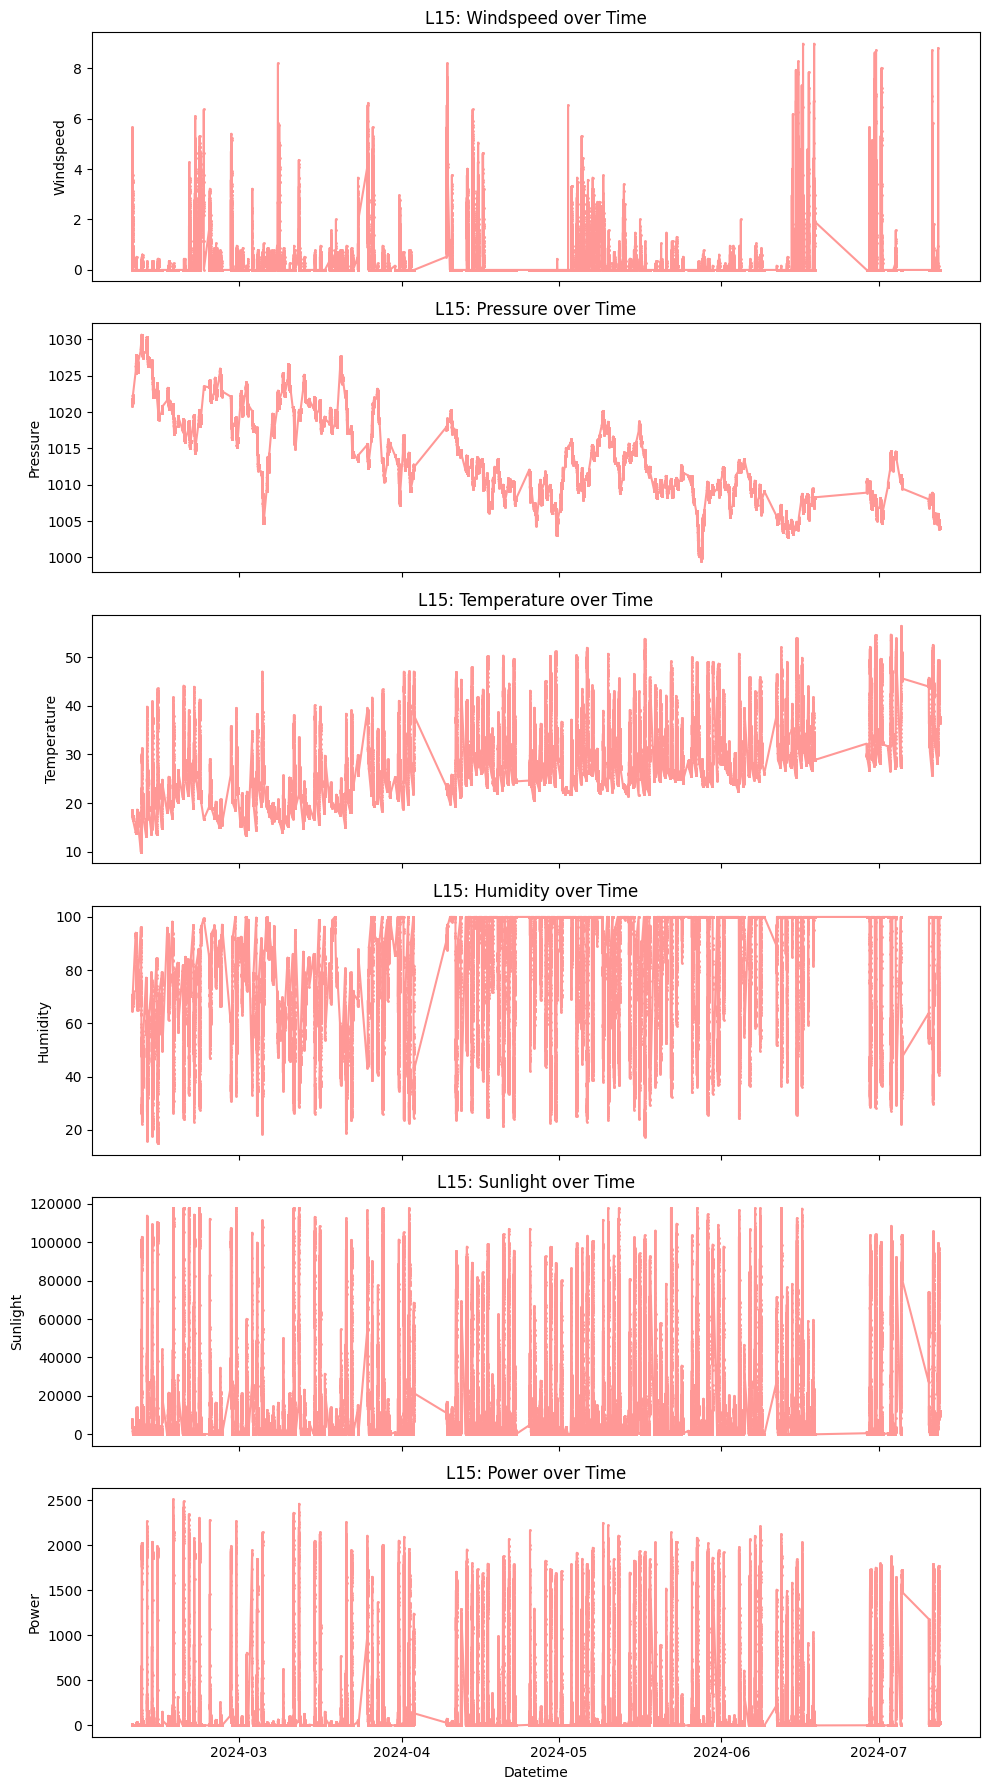

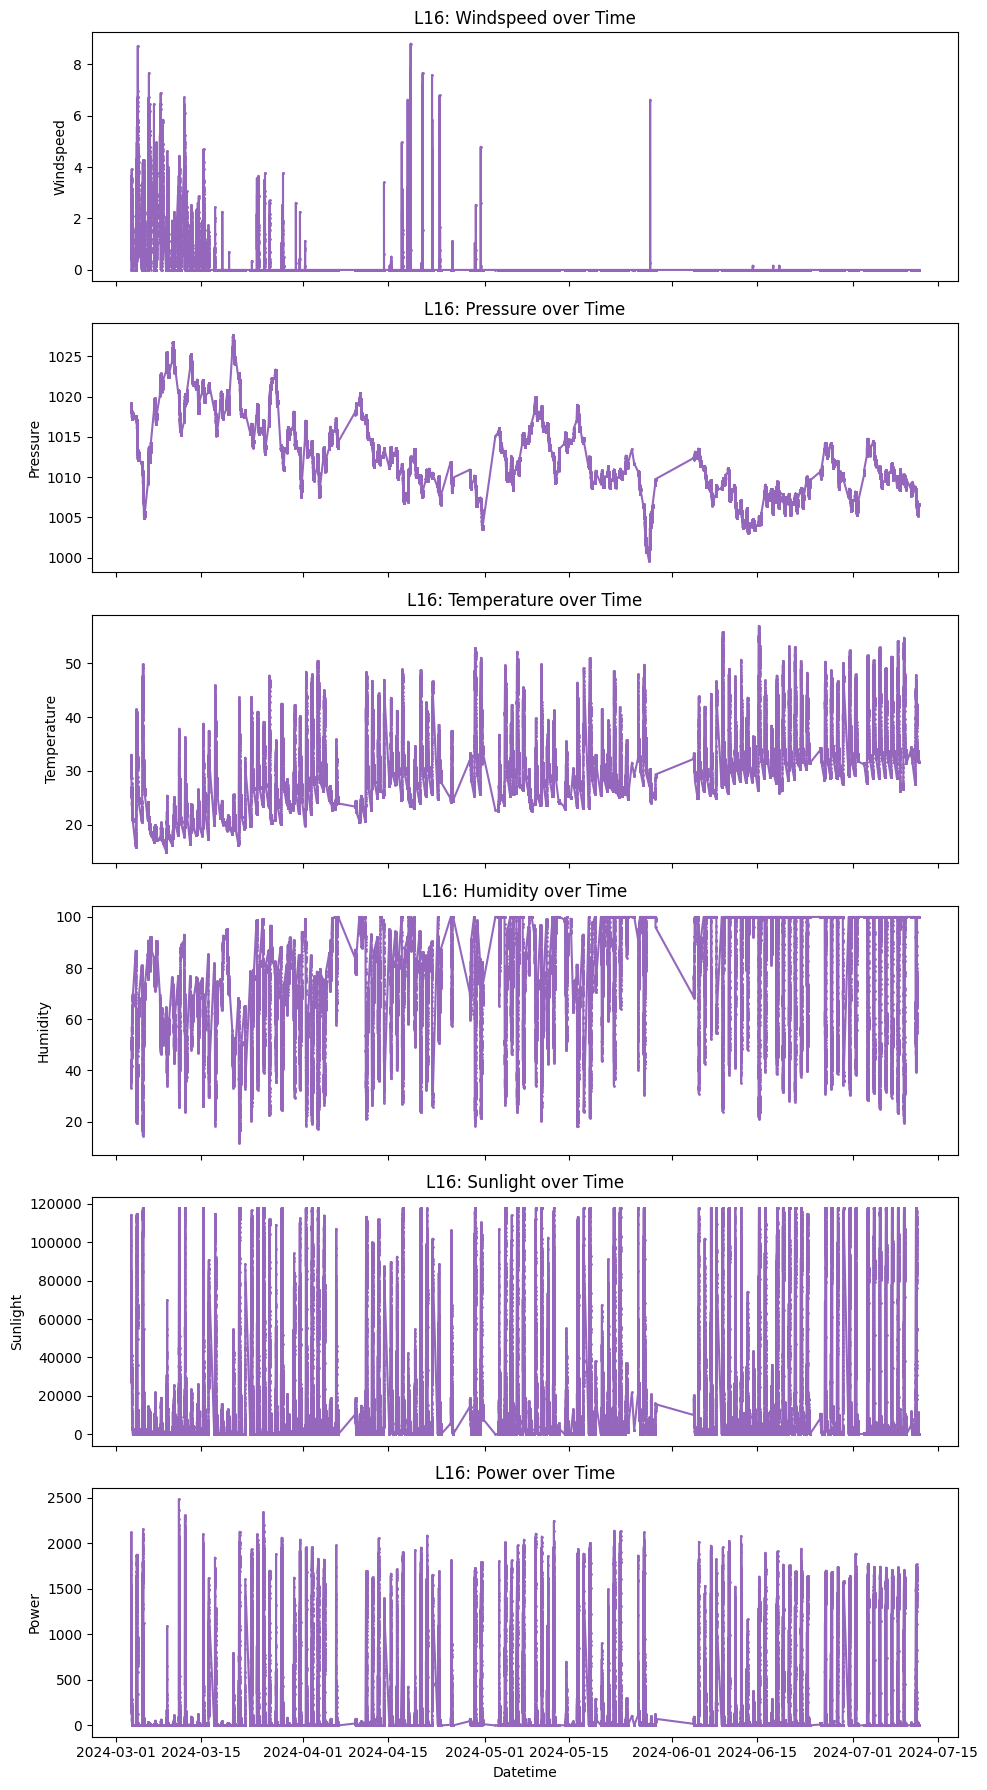

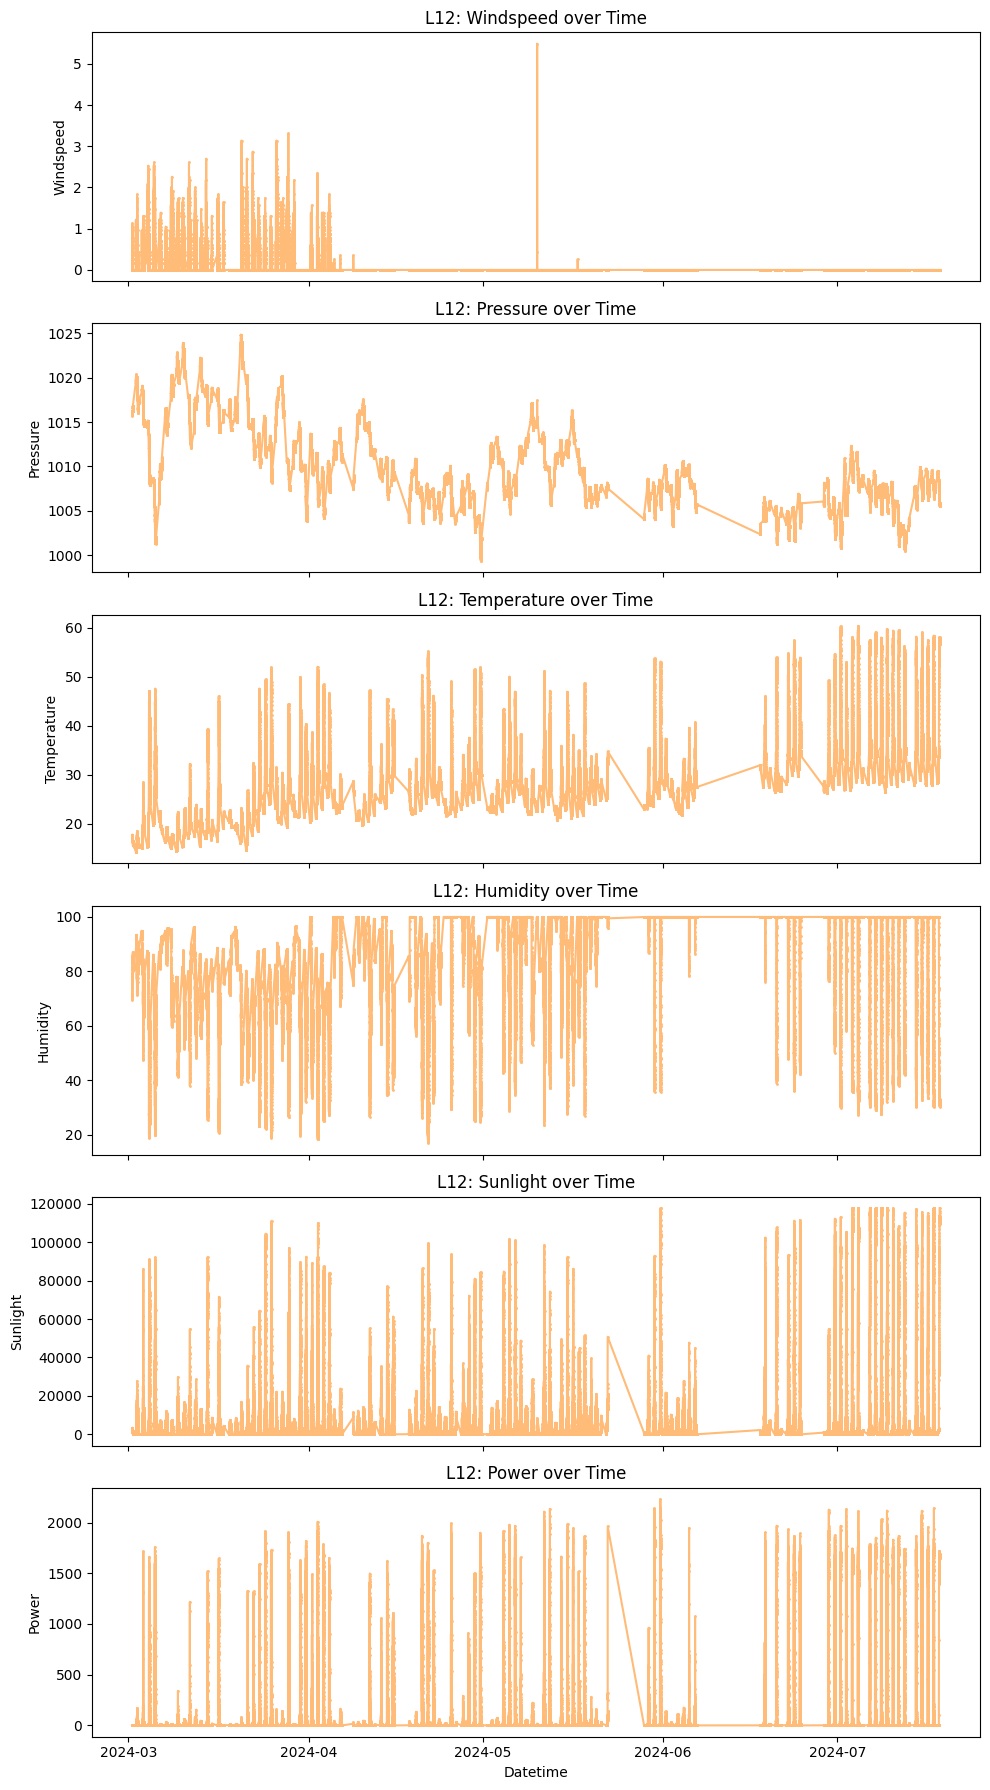

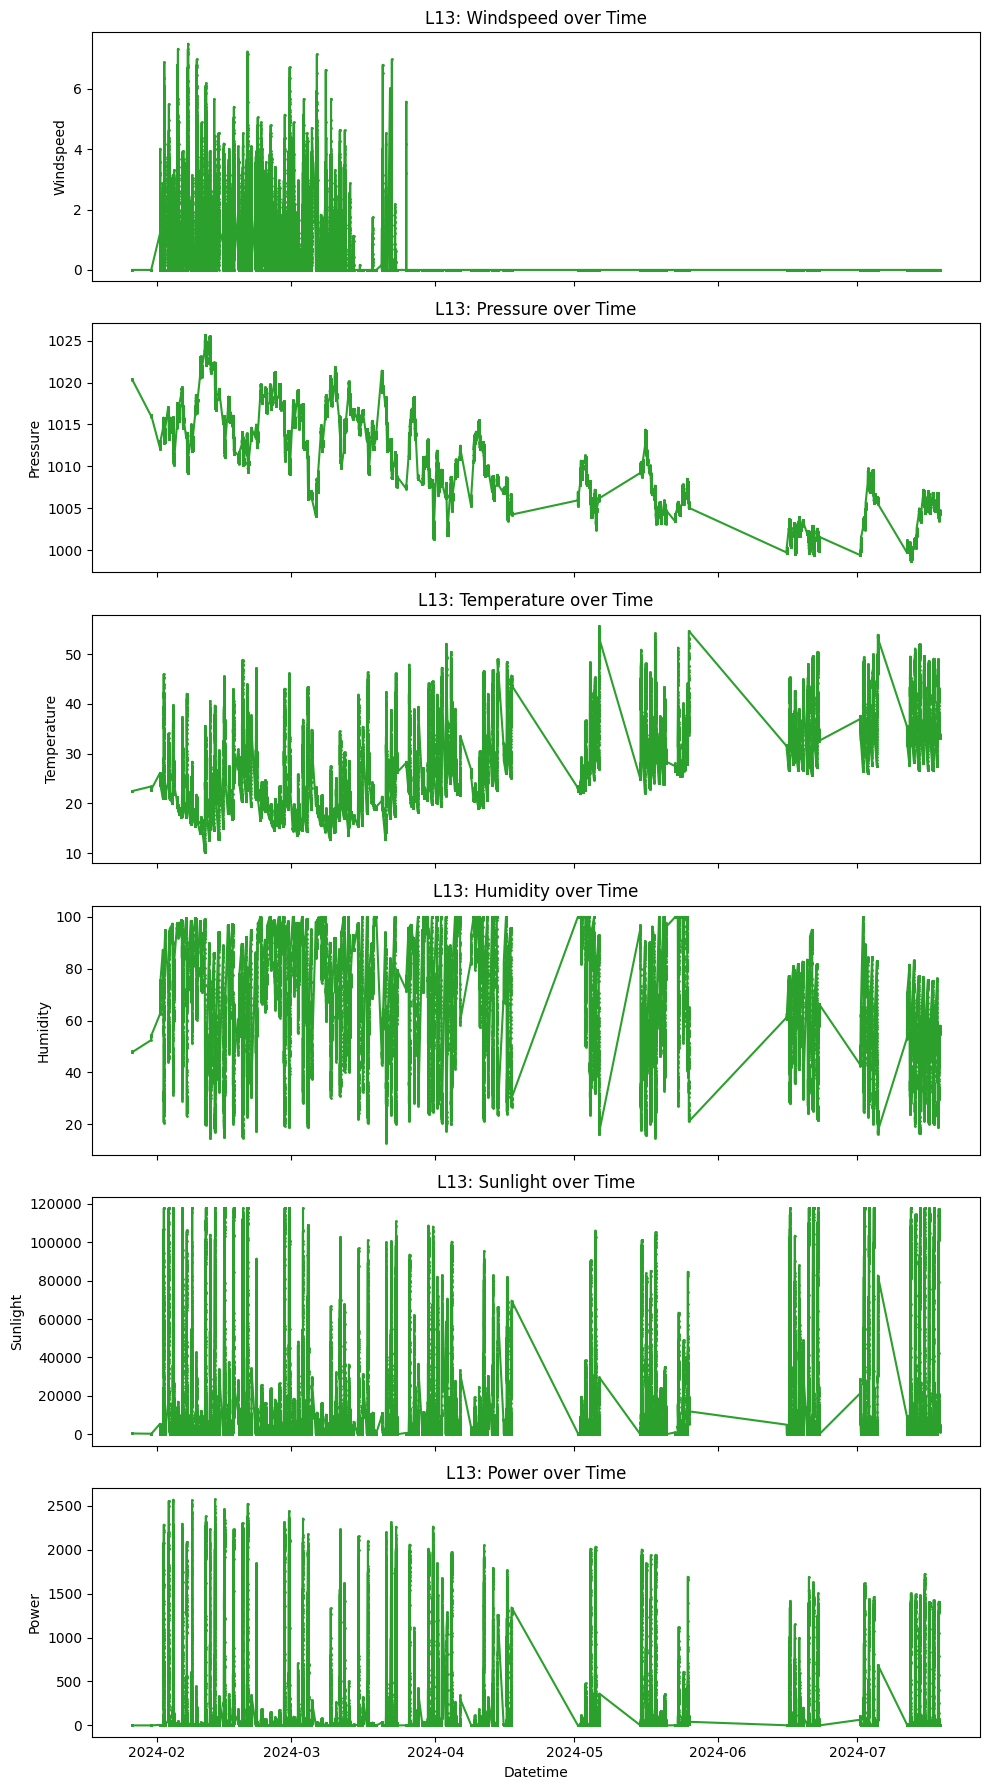

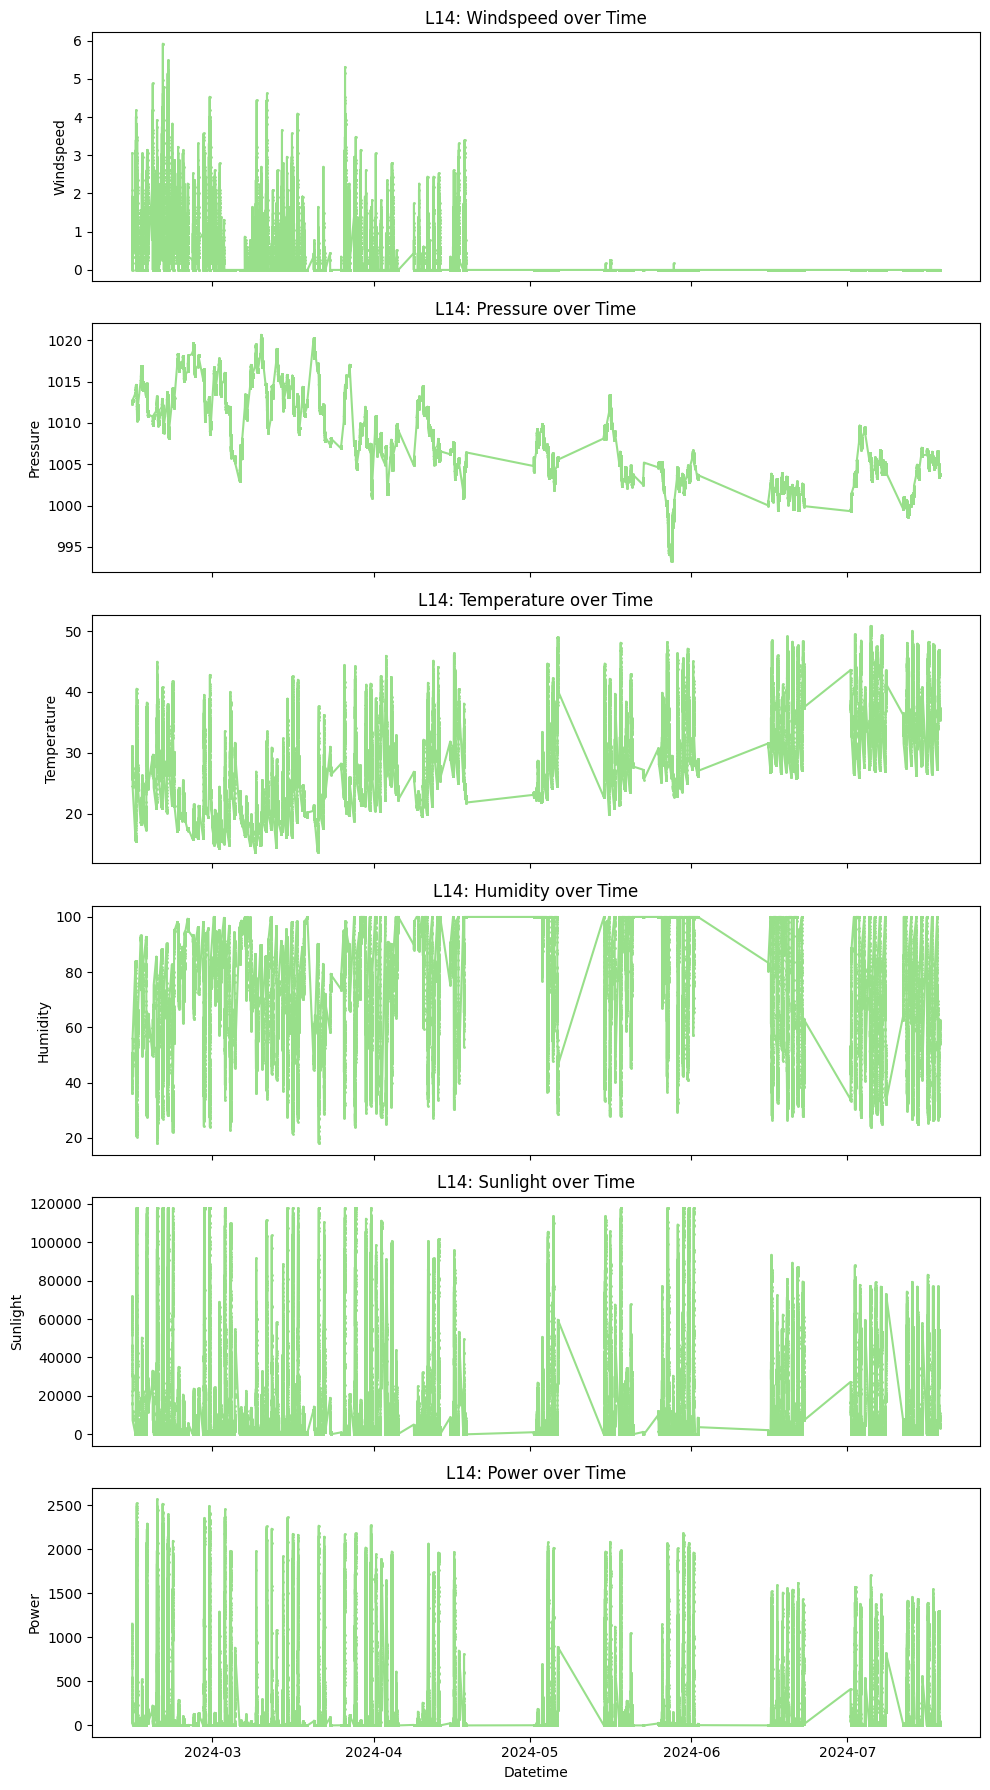

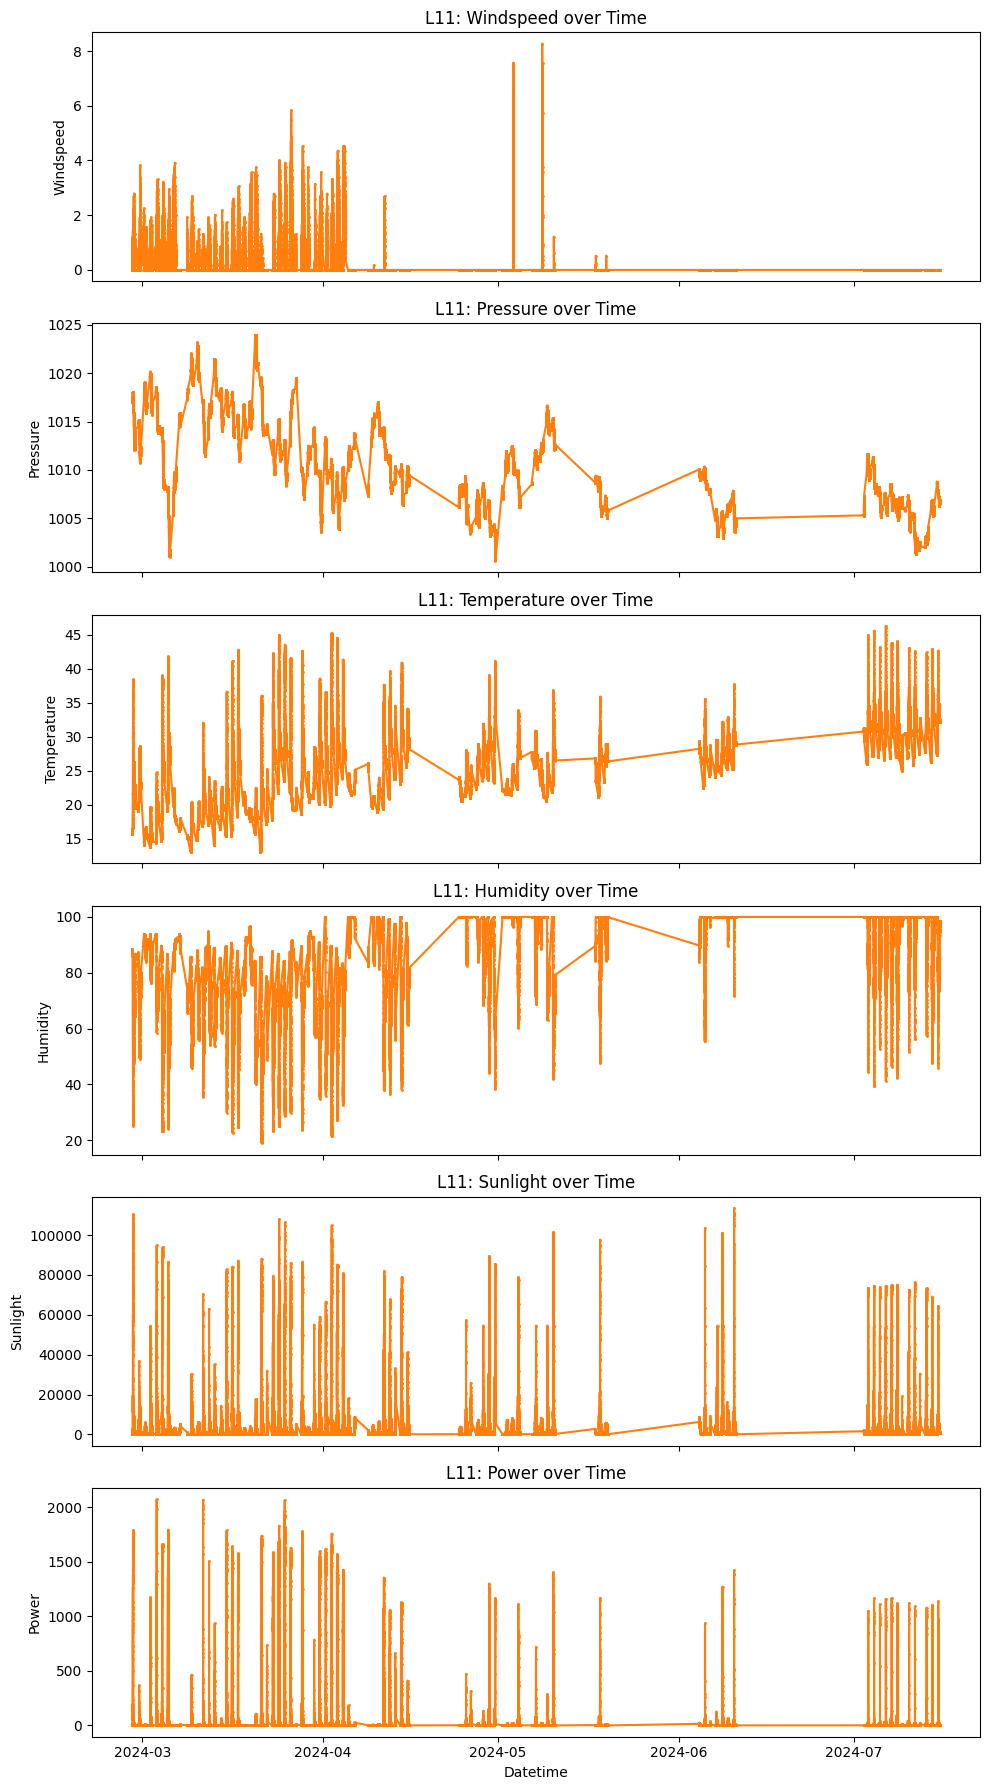

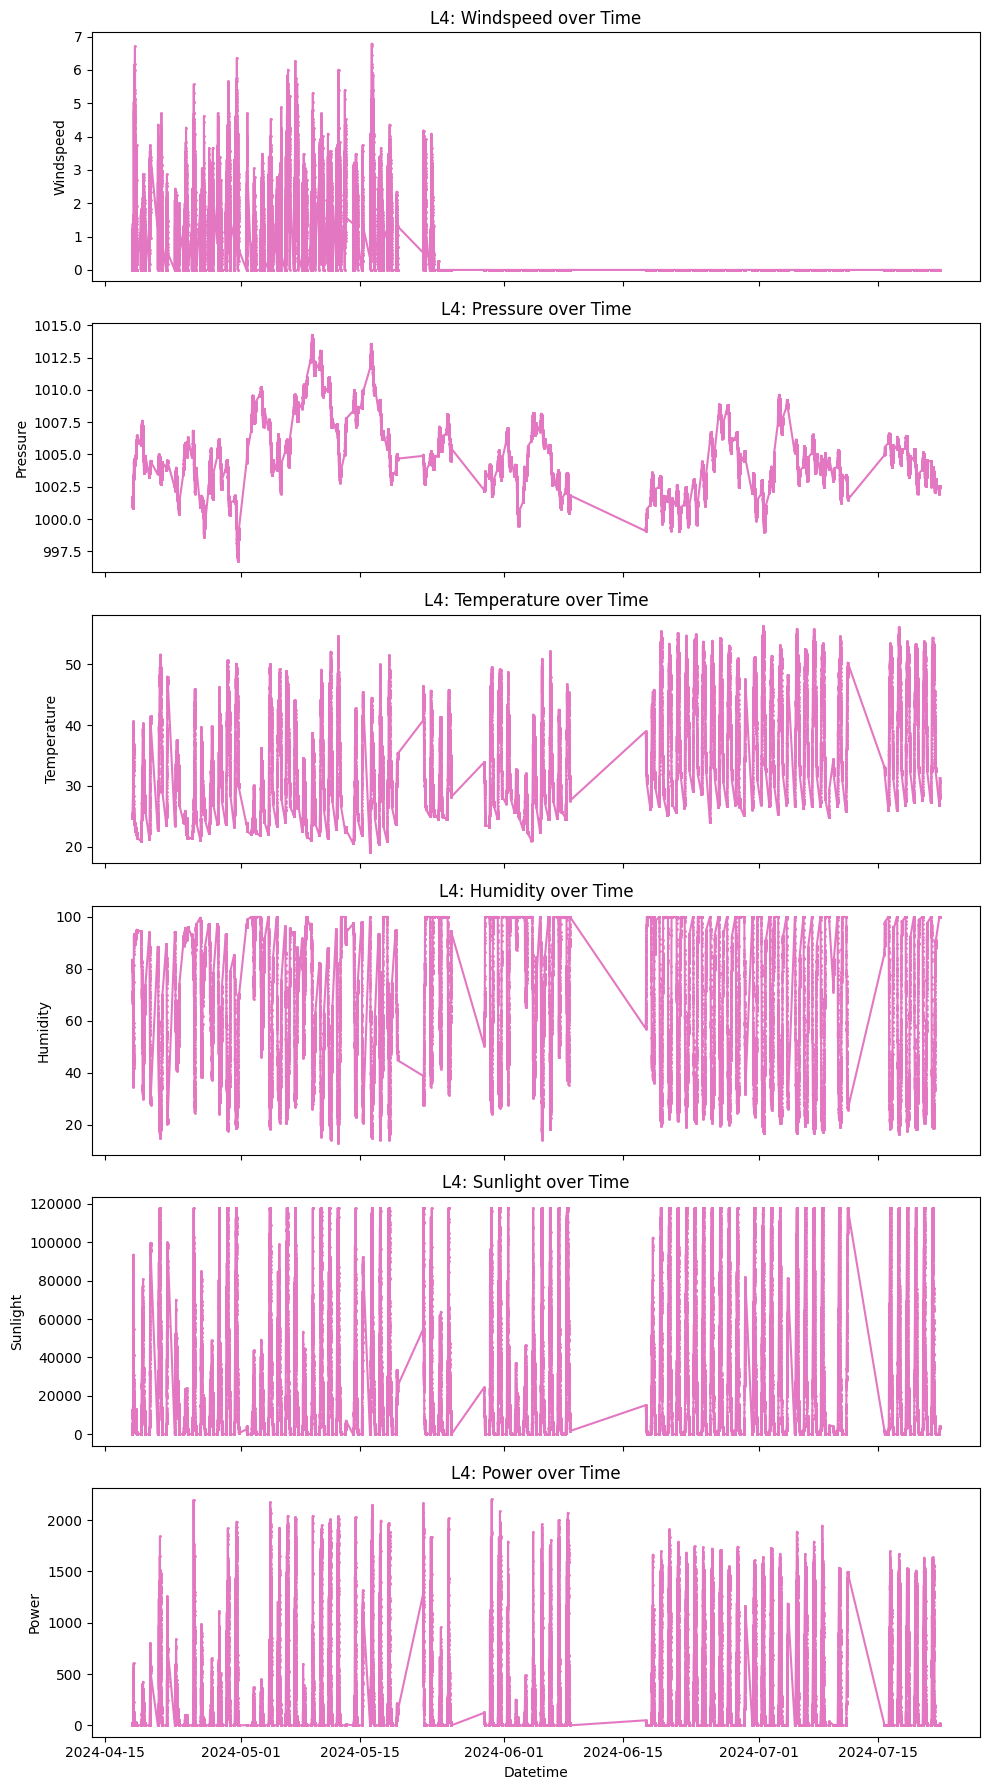

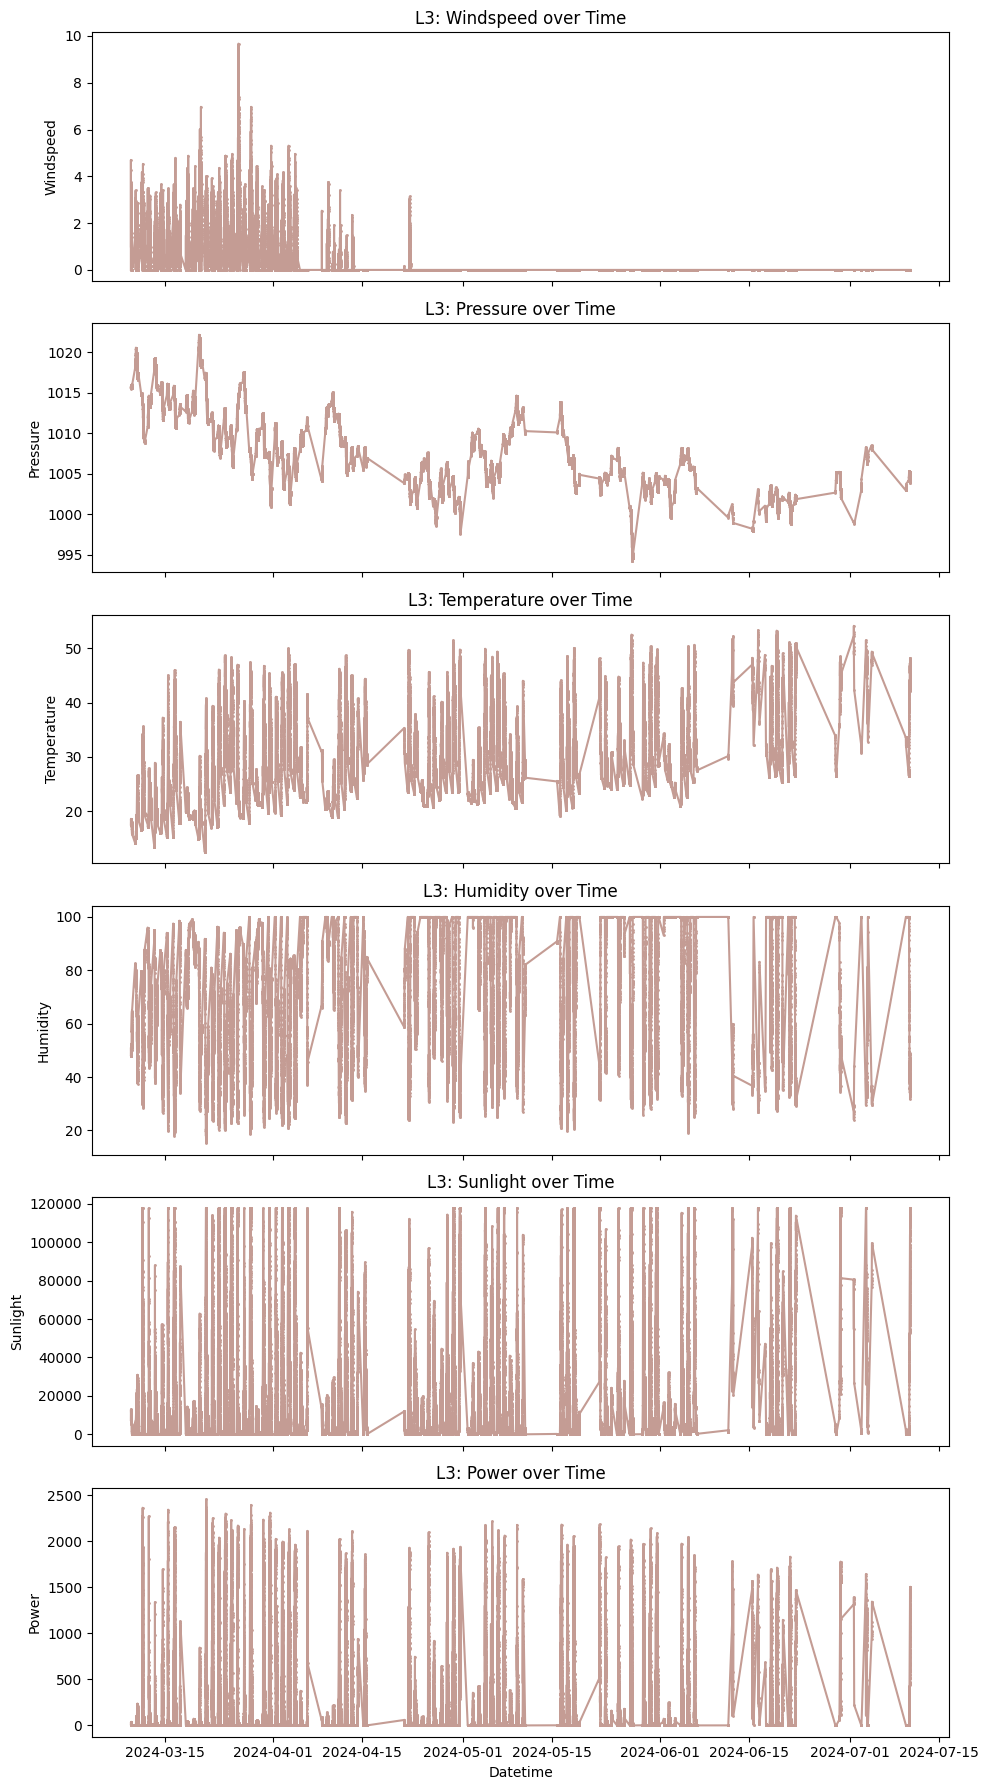

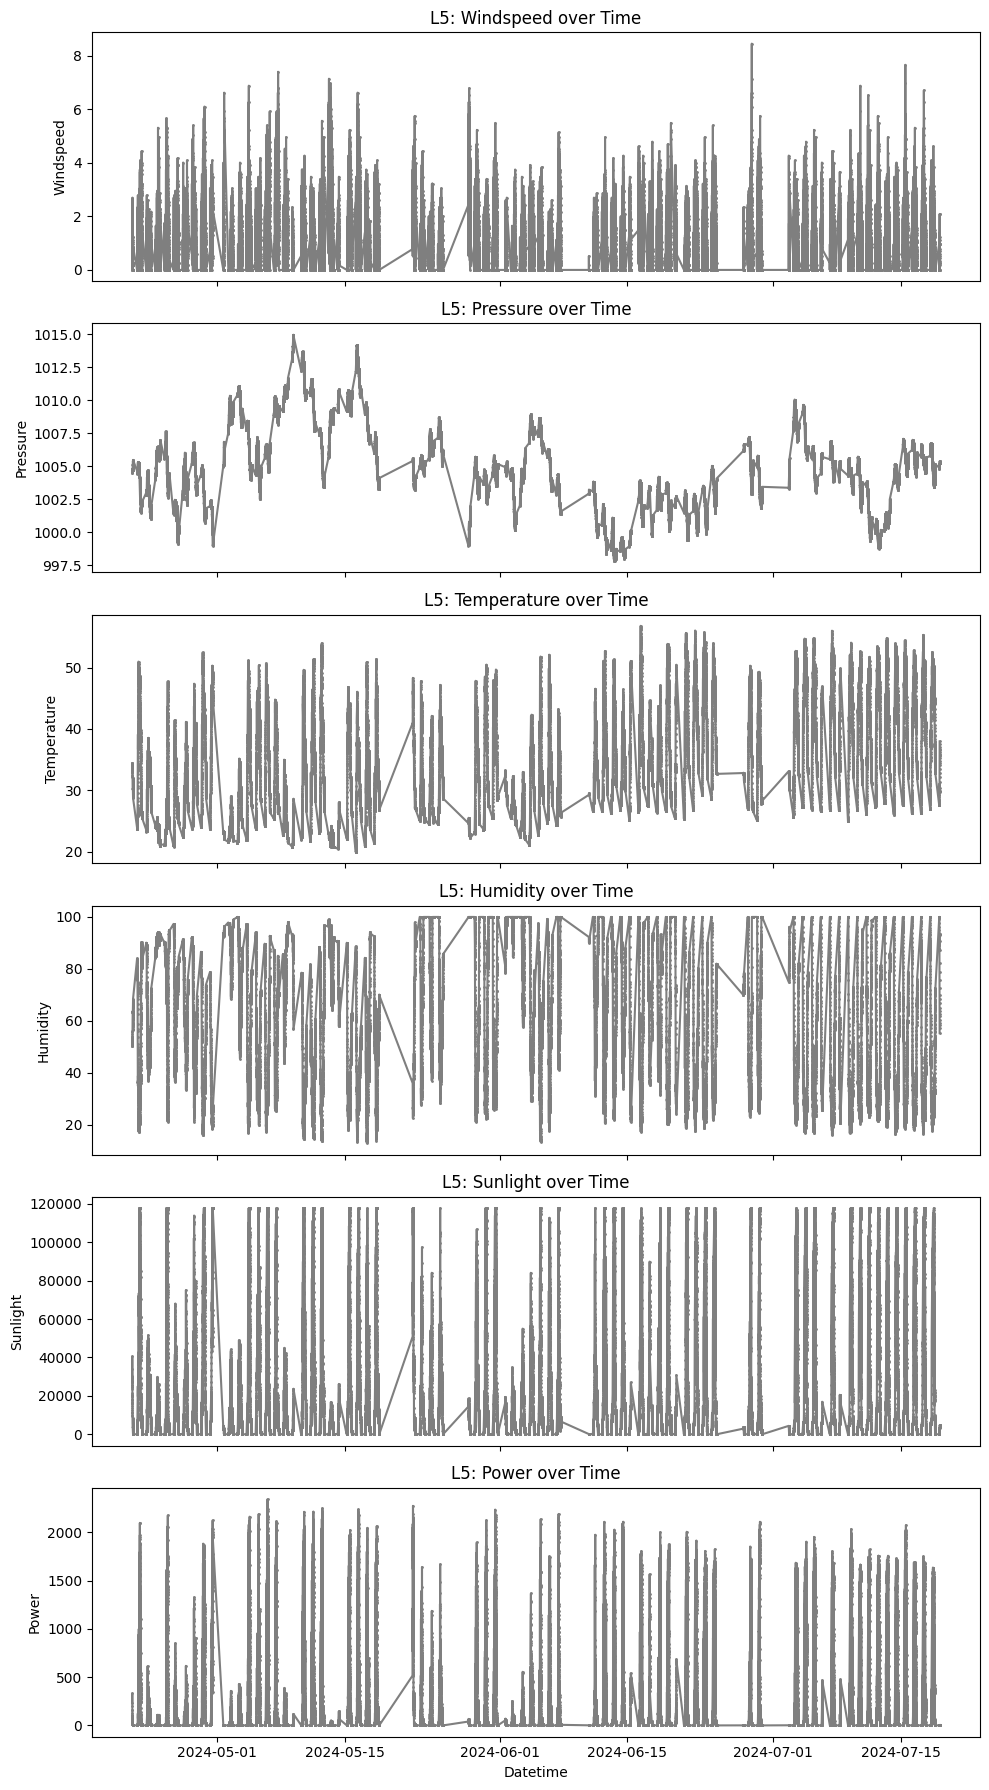

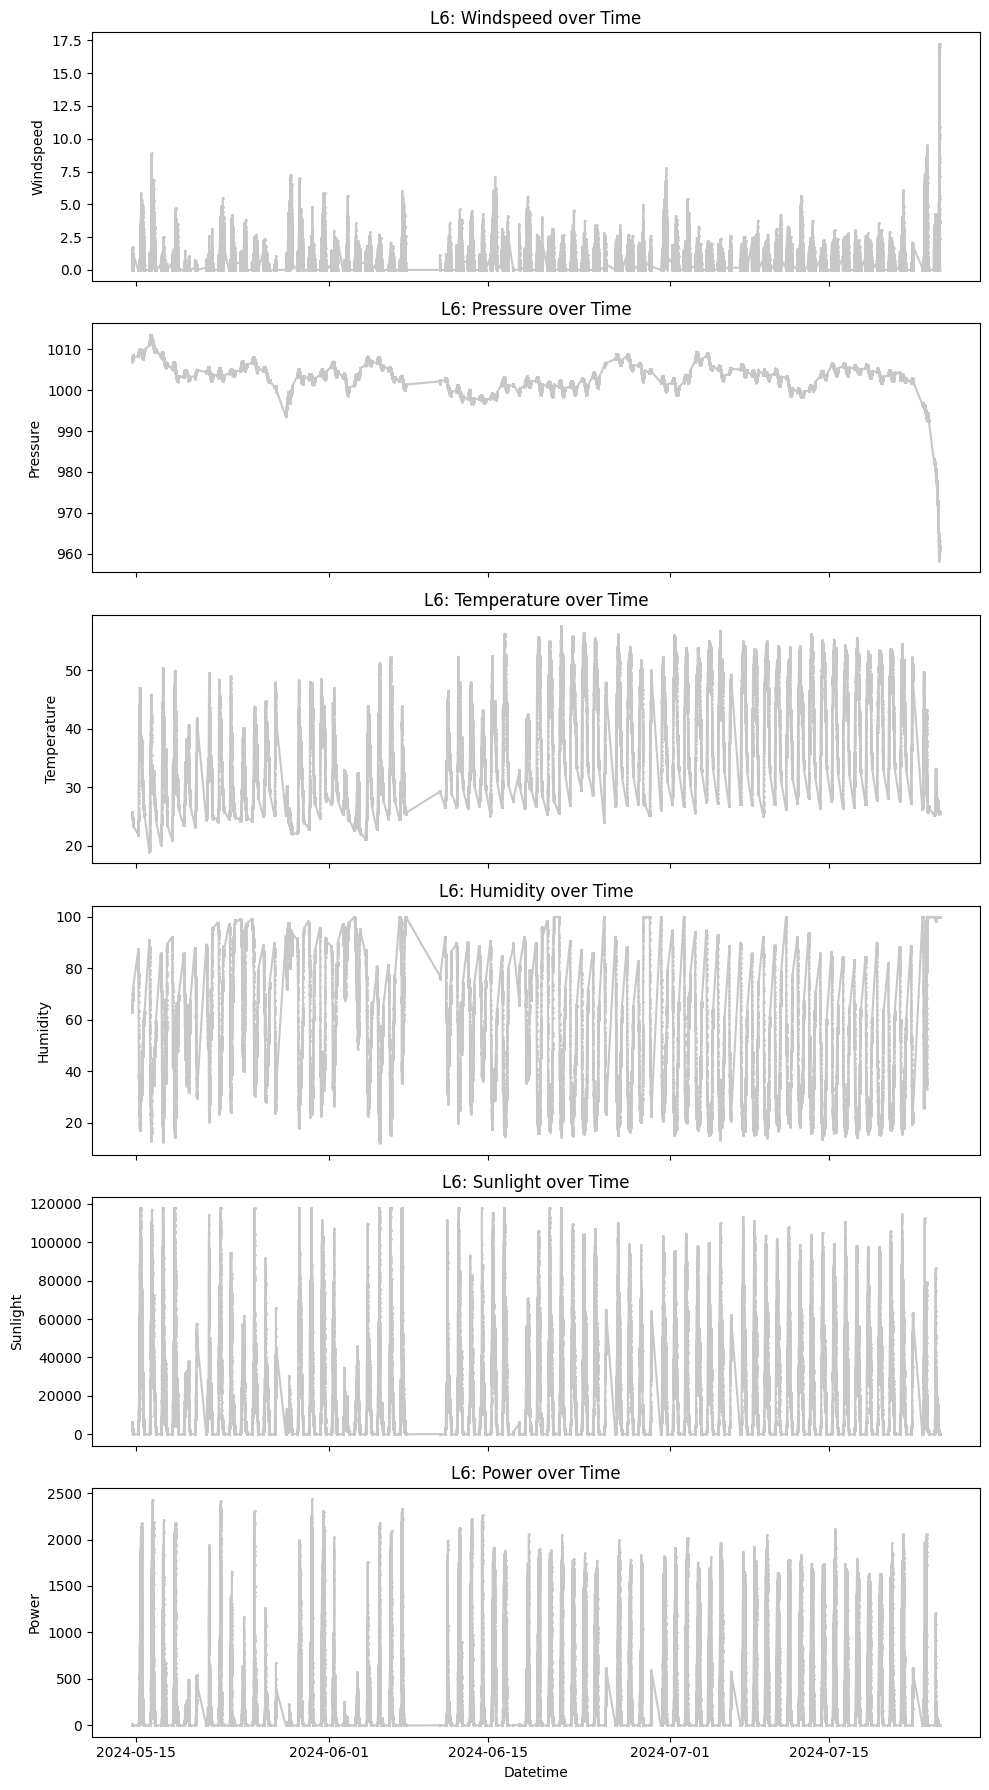

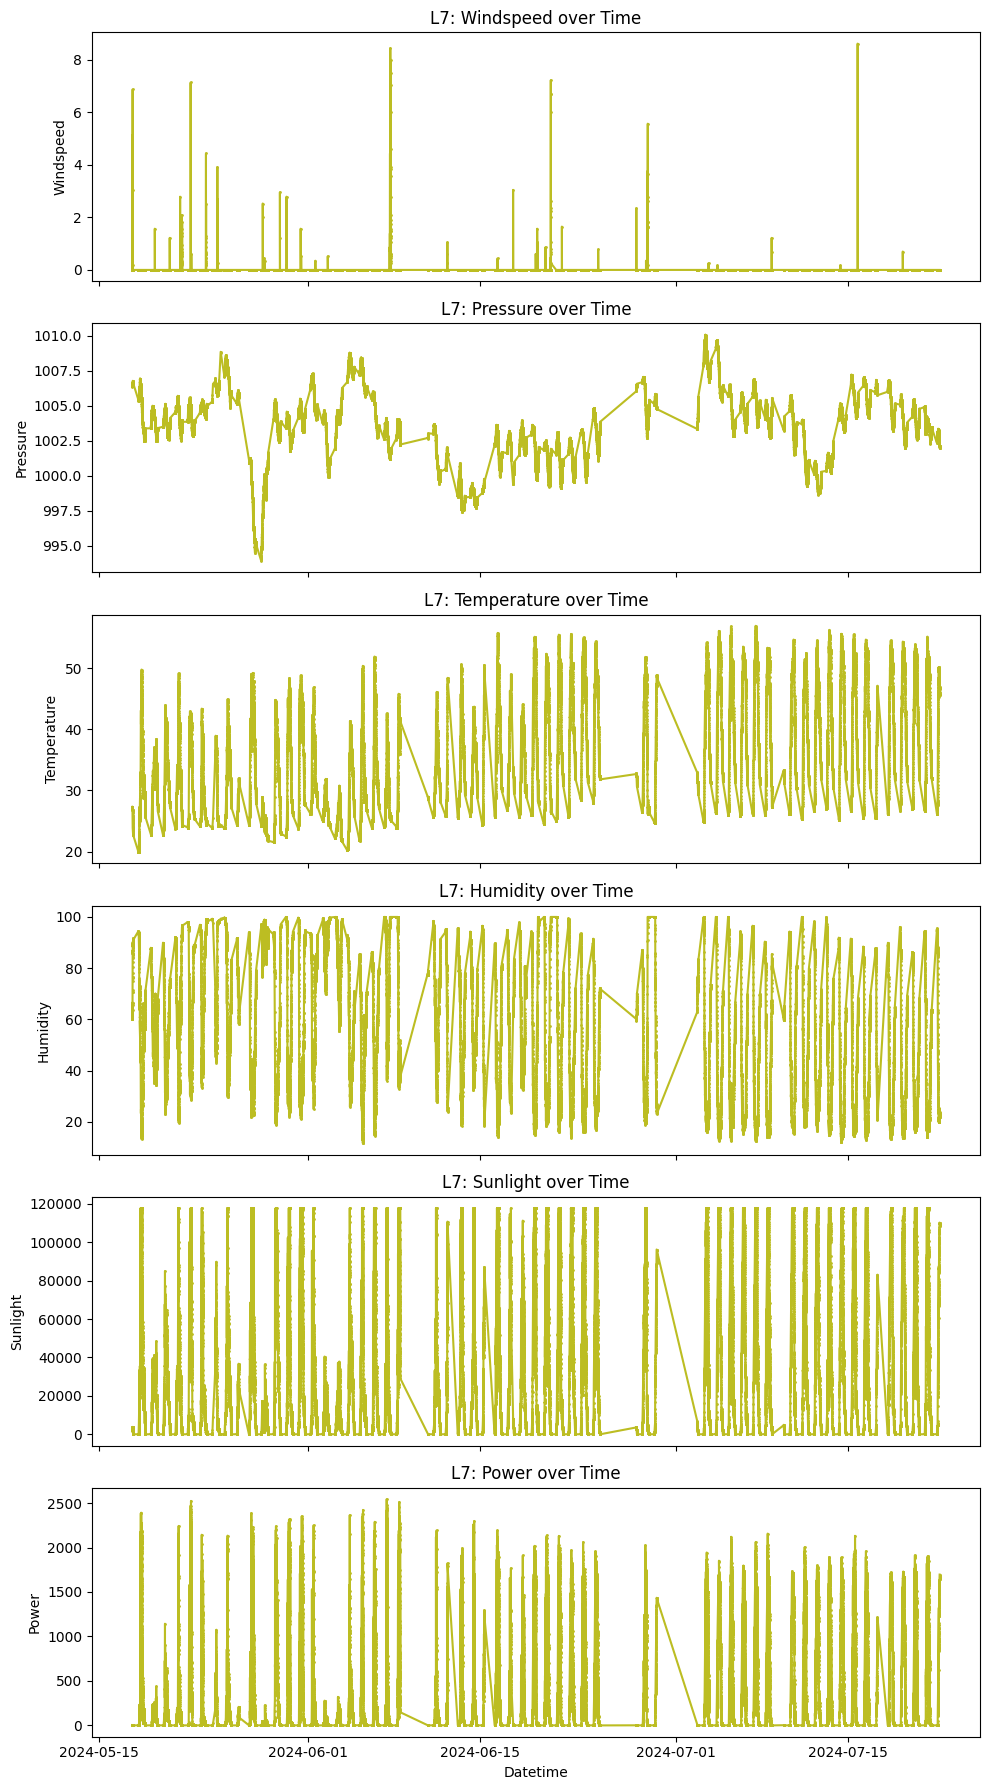

In [14]:
for device in df_raw_data.device.value_counts().index:
    feature_plot(df_raw_data, device, color_dict)

In [15]:
original_cols = ['windspeed', 'pressure', 'temperature', 'humidity', 'sunlight', 'power']

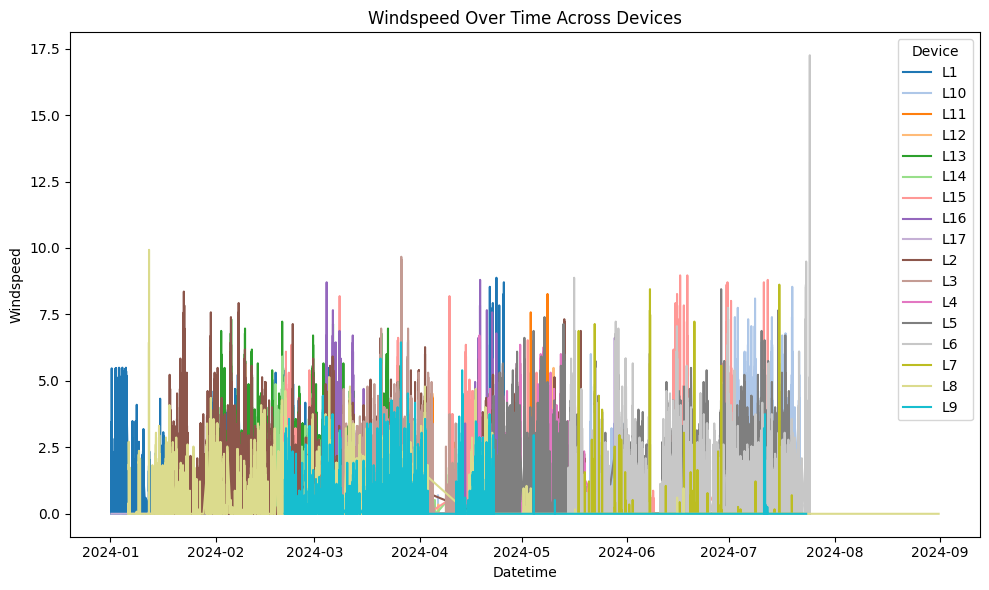

In [23]:
plot_feature_across_devices(df_raw_data, feature='windspeed', color_dict=color_dict, drop_device=None)

#### Windspeed
- Observations  
1. not stable, too much 0  
- Conclusions  
1. remove this feature

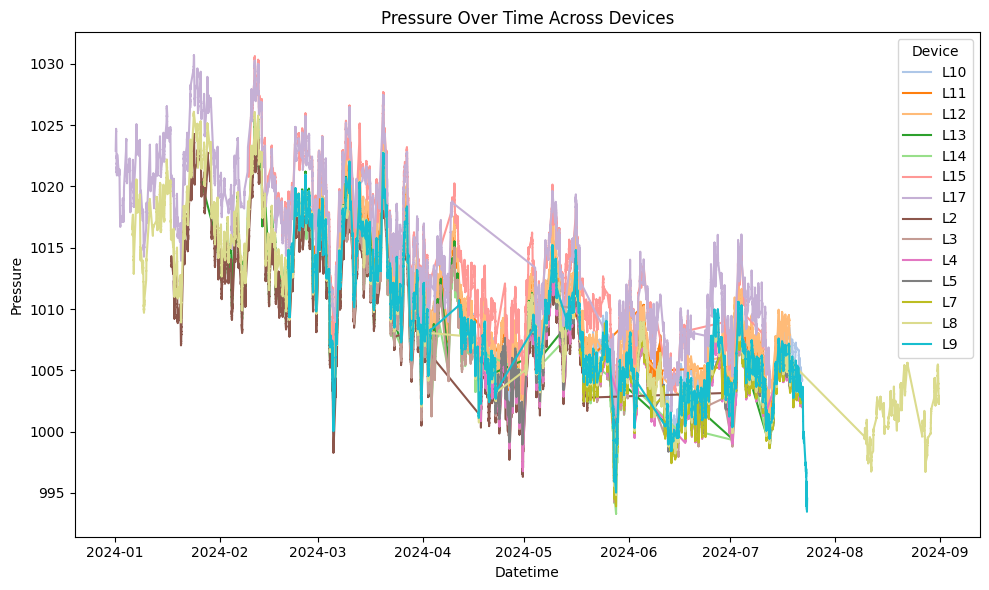

In [25]:
plot_feature_across_devices(df_raw_data, feature='pressure', color_dict=color_dict, drop_device=['L1','L6', 'L16'], )

#### Pressure
- Observations  
1. there is some outliers in L1 and L6
2. pressure of L17 is relative high
3. the fluctuation is big, but the trend is clear
- Conclusions  
1. remove the outliers in L1 and L6
3. create a window feature to test

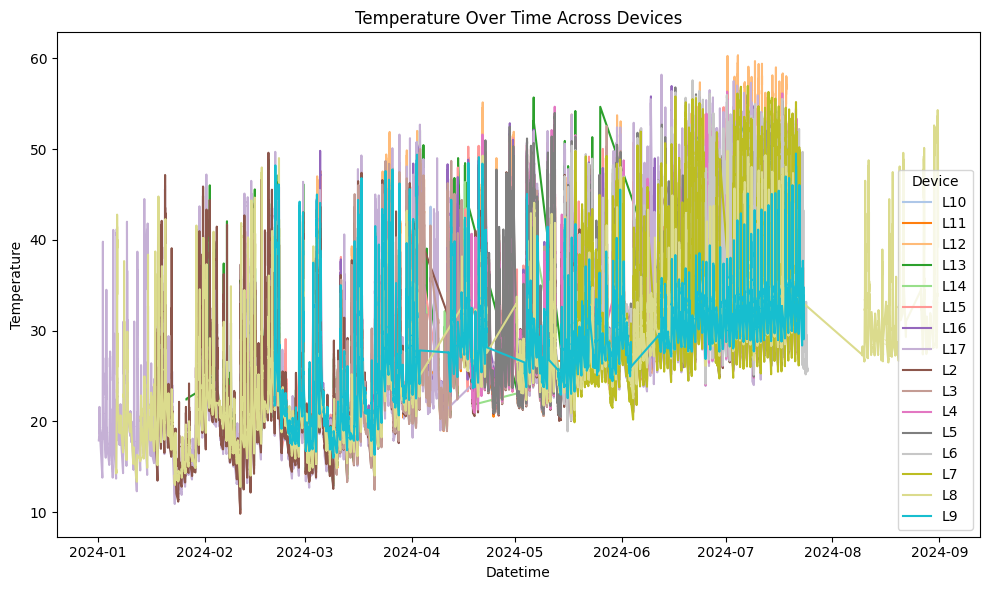

In [26]:
plot_feature_across_devices(df_raw_data, feature='temperature', color_dict=color_dict, drop_device=['L1'])

#### Temperature
- Observations  
1. the trend is similar across devices
2. there is outliers in L1
3. create window feature or train a regression model to replace it
- Conclusions  
1. remove temperature outliers in L1

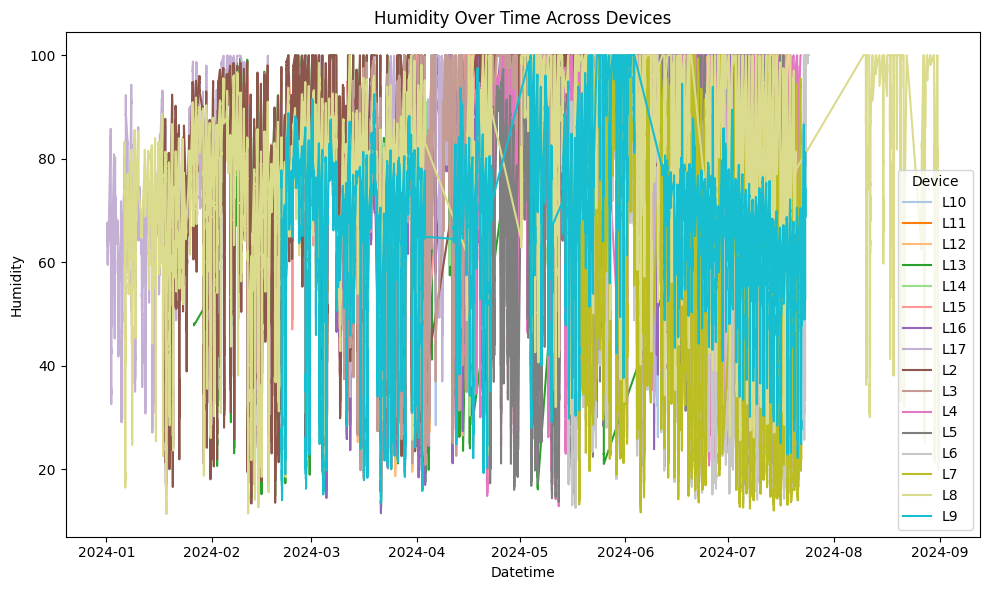

In [24]:
plot_feature_across_devices(df_raw_data, feature='humidity', color_dict=color_dict, drop_device=['L1'])

#### Humidity
- Observations  
1. no obvious trend
2. there is outliers in L1
3. more nad more 100% humidity after 2024-2
4. however, pressure in L9 decrease in summer, which is different with other device
- Conclusions  
1. remove temperature outliers in L1

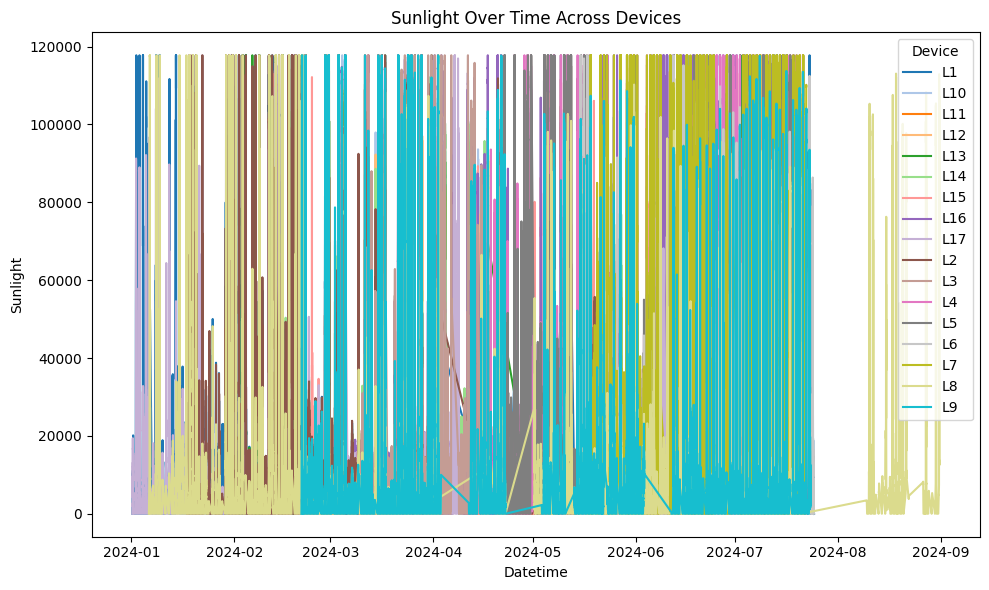

In [27]:
plot_feature_across_devices(df_raw_data, feature='sunlight', color_dict=color_dict, drop_device=None)

#### Sunlight
- Observations  
1. sunlight is a peak for each day
2. the maximum sunlight is problematic
- Conclusions  
1. it not proper for creating window or rolling feature for sunlight
2. may need the lag features from other features to help predict sunlight 

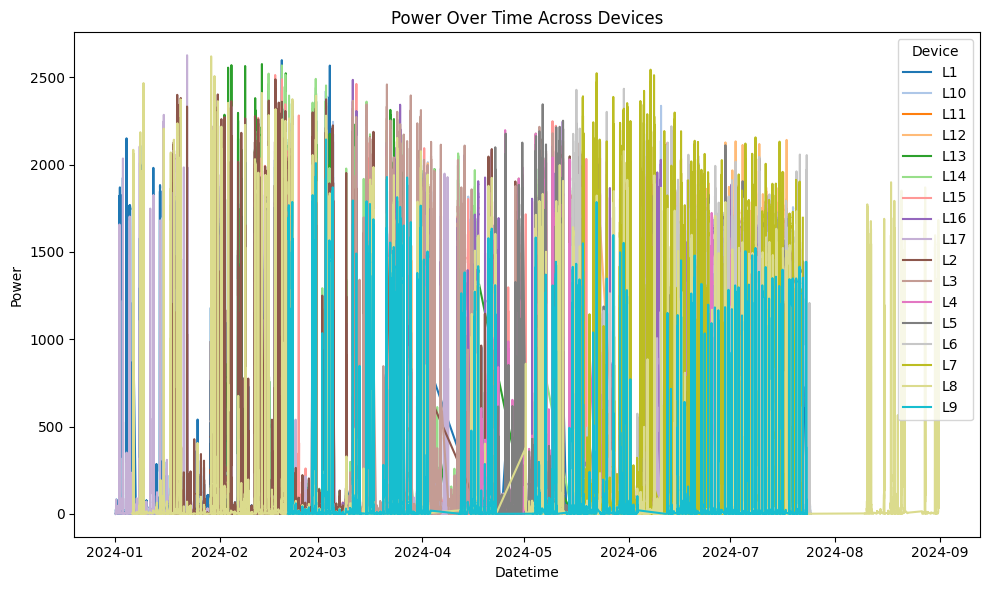

In [28]:
plot_feature_across_devices(df_raw_data, feature='power', color_dict=color_dict, drop_device=None)

#### Power
- Observations  
1. L9 get less sunlight than others after Jun.
2. the trend of sunlight and power kind of similar: it is less in Jun, July, Aug than ealier months
- Conclusions  
1. check the linear relationship with sunlight